In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('diabetes_excelr.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
feature_columns=df.drop('Outcome',axis=1).columns
feature_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

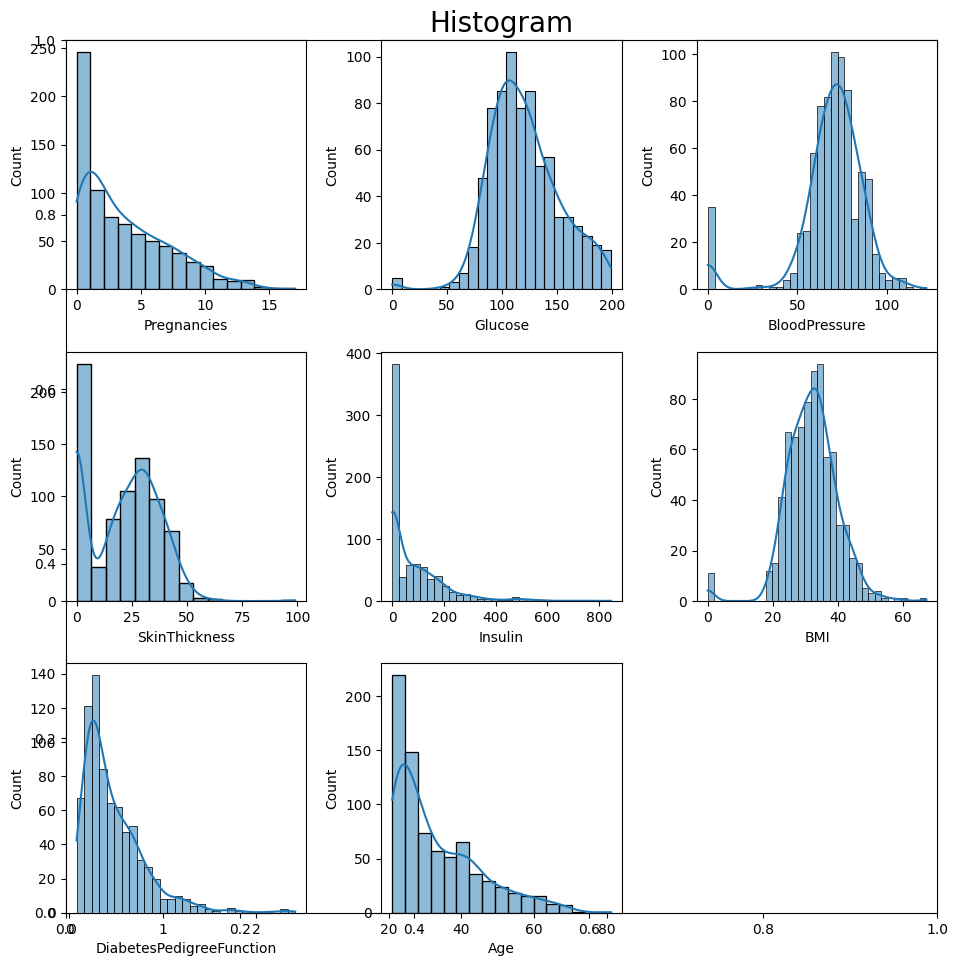

In [8]:
plt.figure(figsize=(10,10))
plt.title('Histogram',fontsize=20)
for i,col_name in enumerate(feature_columns,start=1):
    plt.subplot(3,3,i)
    sns.histplot(df[col_name],kde=True)
    plt.tight_layout()
plt.show()

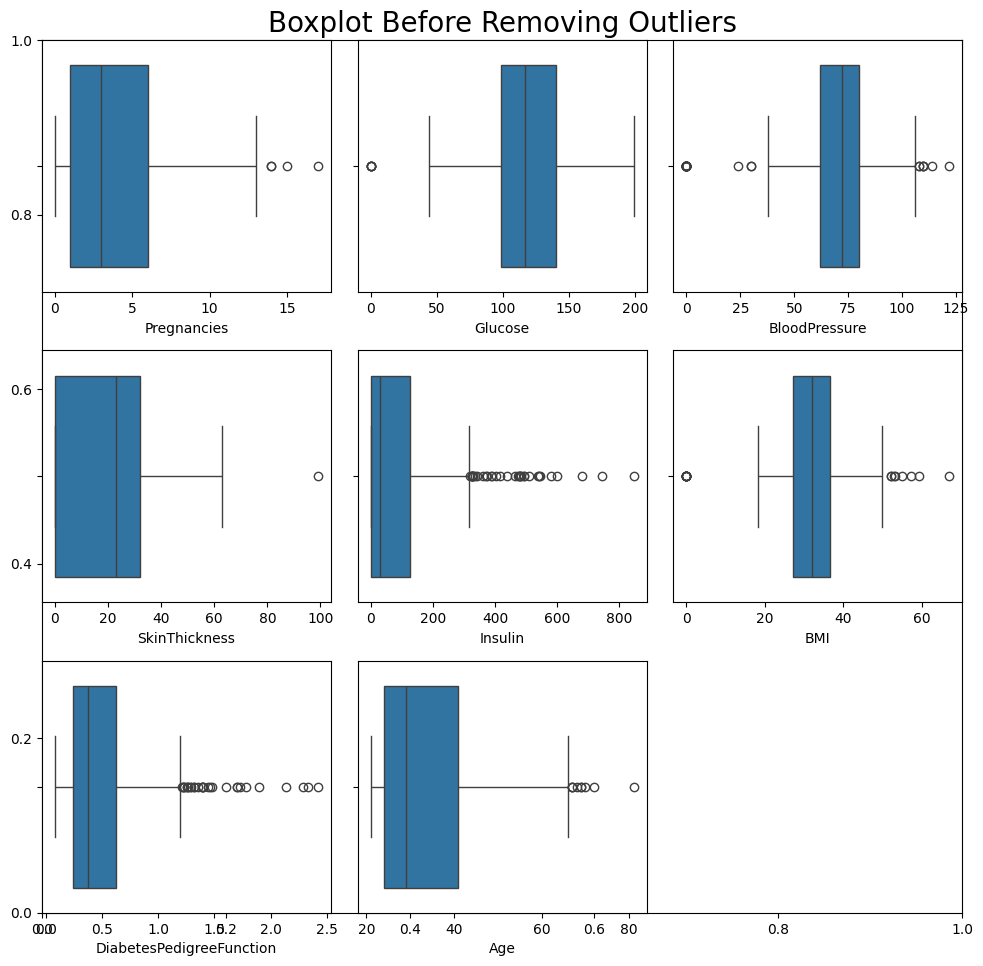

In [9]:
plt.figure(figsize=(10,10))
plt.title('Boxplot Before Removing Outliers',fontsize=20)
for i,col_name in enumerate(feature_columns,start=1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col_name])
    plt.tight_layout()
plt.show()

In [10]:
for col_name in feature_columns:
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    df[col_name]=df[col_name].clip(lower_limit,upper_limit)

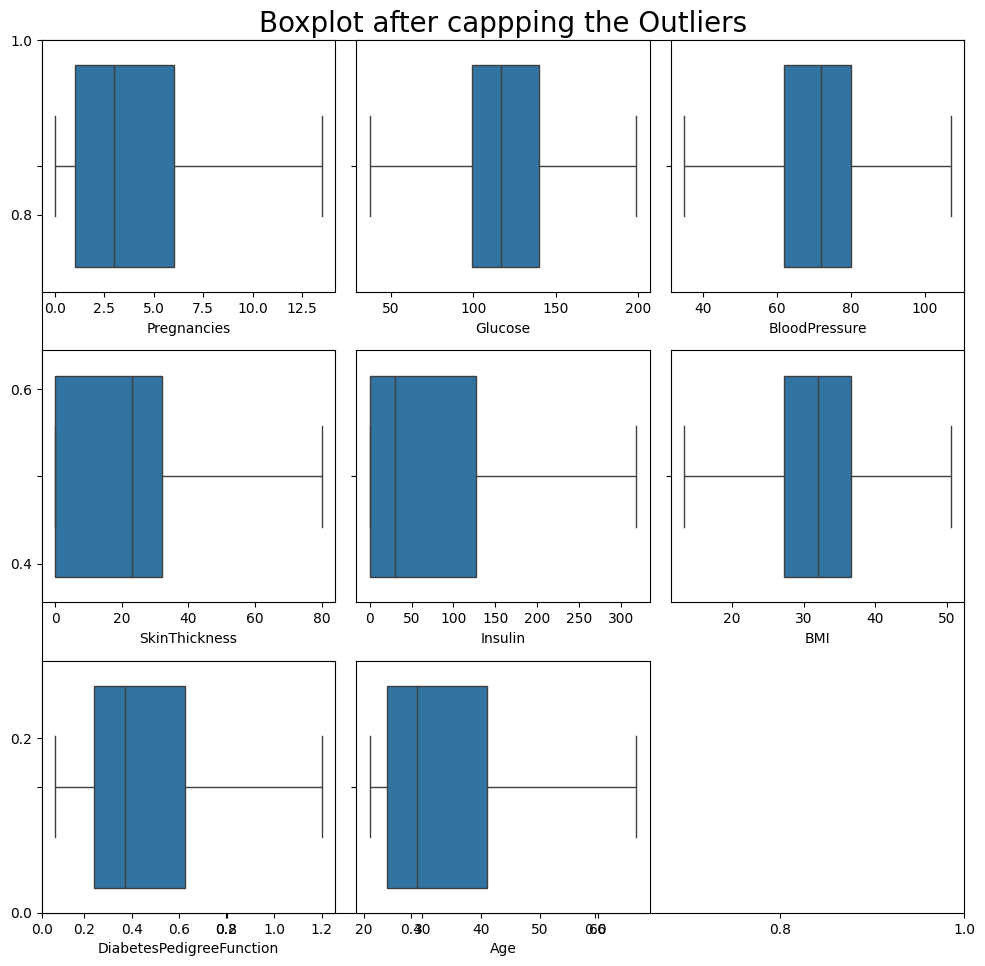

In [11]:
plt.figure(figsize=(10,10))
plt.title('Boxplot after cappping the Outliers',fontsize=20)
for i,col_name in enumerate(feature_columns,start=1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df[col_name])
    plt.tight_layout()
plt.show()

In [12]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [13]:
y.value_counts()

# since there is imbalanced class so we have to make the data balanced

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [15]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [18]:
X_train_smote.shape,y_train_smote.shape

((802, 8), (802,))

In [19]:
y_train_smote.value_counts()

Outcome
0    401
1    401
Name: count, dtype: int64

In [20]:
from xgboost import XGBClassifier

In [21]:
xgb=XGBClassifier(n_estimators=110,max_depth=3,learning_rate=0.01)

In [22]:
xgb.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
y_pred=xgb.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,classification_report

In [25]:
round(accuracy_score(y_test,y_pred),2)

0.71

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        99
           1       0.57      0.80      0.67        55

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.71      0.72       154



In [27]:
from lightgbm import LGBMClassifier

In [28]:
lgb=LGBMClassifier(n_estimators=100,learning_rate=0.01)

In [29]:
lgb.fit(X_train_smote,y_train_smote)

[LightGBM] [Info] Number of positive: 401, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1092
[LightGBM] [Info] Number of data points in the train set: 802, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMClassifier(learning_rate=0.01)

In [30]:
y_pred1=lgb.predict(X_test)

In [31]:
round(accuracy_score(y_test,y_pred1),2)

0.72

In [32]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        99
           1       0.59      0.75      0.66        55

    accuracy                           0.72       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.74      0.72      0.73       154

